# Sesión 8
## Análisis de datos con python
### Jorge M. Orozco Thomas
<img src="img/Logo_uninorte.jpg" alt="Imagen" width="900" height="150">

---

Objetivos de esta sesión  
 
✔ Desarrollar creatividad al momento de enfrentar diferentes problemas con las bases de datos.
✔ Tener una estrategia de trabajo definida para comenzar el tratamiento de bases de datos según nuestras necesidades.  
✔ Generar archivos para un ambito de trabajo colaborativo.

---

# Graduation Rate

```python
# Paso 1. Conocer nuestra base de datos
```

Esta parte no la podemos automatizar (aún) por lo cual es crucial que antes de siquiera importar la base de datos a nuestro entorno de trabajo tengamos claro varios aspectos:  
 1. La naturaleza de nuestros datos.  
 2. La estructura lógica de la base de datos.  
 3. ¿Que nos interesa de esta base de datos?
 4. ¿Vale la pena siquiera crear un script de Python?

---

```python
# Paso 2. Análisis exploratorio
## Cargar nuestra base de datos en el entorno de trabajo.
import pandas as pd
df5=pd.read_stata('graduation_rate.dta')
df.head()
df.tail()
df.info()
```

Explorando esta base de datos nos damos cuenta que:
- Hay valores nulos en algunos campos.
- El nombre de las variables es poco atractivo y nada informativo.
- La verdad no sabemos que significa cada cosa.
- Existen valores duplicados.

Por lo que empezaremos el **tratamiento básico**:

---
```python
# Paso 3. Tratamiento básico
# Recodificar las variables
df=df.rename(columns={'AC20':'ACT_Composition_score','AC21':'SAT_Total_Score','AC22':'Parental_level_of_education','AC23':'Parental_income','AC24':'high_school_gpa','AC25':'collegue_gpa','AC26':'years_to_graduate'})
# Eliminar todos los valores nulos del dataframe
df.dropna(inplace=True)
#Con la opción estandar no funciona. ¿Por Qué?
df=df.replace('nan', None)
df = df.dropna()
#Convertir a los tipos de datos correspondientes:
df['ACT_Composition_score']=df['ACT_Composition_score'].astype(int)
df['SAT_Total_Score']=df['SAT_Total_Score'].astype(int)
df['Parental_income']=df['Parental_income'].astype(int)
df['high_school_gpa']=df['high_school_gpa'].astype(float)
df['collegue_gpa']=df['collegue_gpa'].astype(float)
df['years_to_graduate']=df['years_to_graduate'].astype(int)
```

# Análisis de los datos

```python
#analisis
import matplotlib.pyplot as plt
plt.hist(df5['ACT_Composition_score'])
plt.title("Distribución de ACT")
plt.xlabel("ACT")
plt.ylabel("Frecuencia")
plt.show()

#summary
df5['ACT_Composition_score'].describe()
df5

#grafico de dispersion
plt.scatter(df5['high_school_gpa'], df5['ACT_Composition_score'])
plt.xlabel('high')
plt.ylabel('ACT')
plt.title('Gráfico de dispersión')
plt.show()
```
---

# Exportar nuestra base de datos luego de tratada.

```python
df.to_stata("baseTrabajada",write_index=False)
```

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AC20    2500 non-null   object
 1   AC21    2500 non-null   object
 2   AC22    2500 non-null   object
 3   AC23    2500 non-null   object
 4   AC24    2500 non-null   object
 5   AC25    2500 non-null   object
 6   AC26    2500 non-null   object
dtypes: object(7)
memory usage: 156.2+ KB


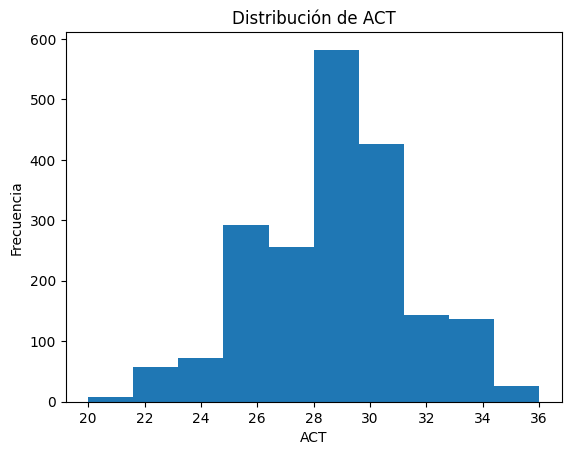

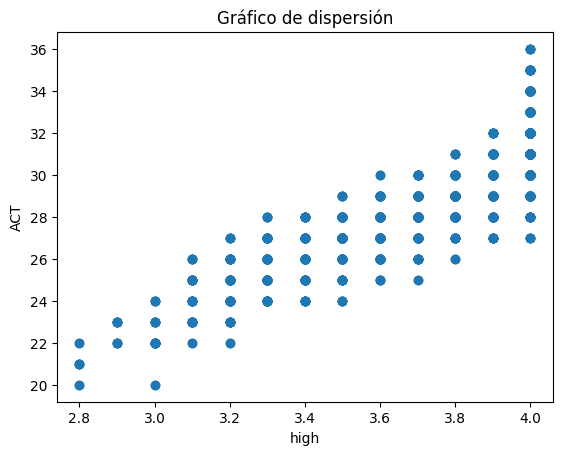

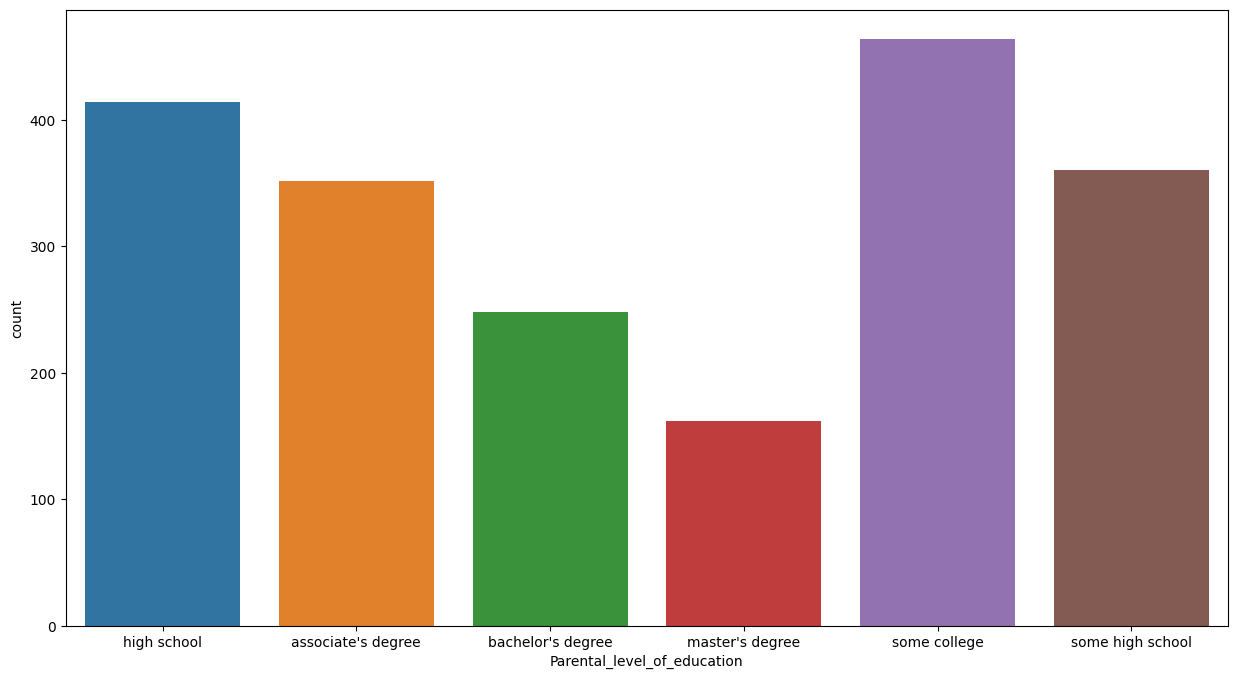

In [15]:
import pandas as pd
df=pd.read_stata('graduation_rate.dta')
df.info()
df.tail()
df.head()
#renombrar las variables.
df=df.rename(columns={'AC20':'ACT_Composition_score','AC21':'SAT_Total_Score','AC22':'Parental_level_of_education','AC23':'Parental_income','AC24':'high_school_gpa','AC25':'collegue_gpa','AC26':'years_to_graduate'})
#explorar el dataset
#intentemos eliminar los valores nulos, con dropna de primeras no podremos, debemos cambiar algo ligeramente
df=df.replace('nan', None)
df = df.dropna()
#convertir a tipo de numeros 
df['ACT_Composition_score']=df['ACT_Composition_score'].astype(int)
df['SAT_Total_Score']=df['SAT_Total_Score'].astype(int)
df['Parental_income']=df['Parental_income'].astype(int)
df['high_school_gpa']=df['high_school_gpa'].astype(float)
df['collegue_gpa']=df['collegue_gpa'].astype(float)
df['years_to_graduate']=df['years_to_graduate'].astype(int)
#analisis
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['ACT_Composition_score'])
plt.title("Distribución de ACT")
plt.xlabel("ACT")
plt.ylabel("Frecuencia")
plt.show()

#summary
df['ACT_Composition_score'].describe()
df

#grafico de dispersion
plt.scatter(df['high_school_gpa'], df['ACT_Composition_score'])
plt.xlabel('high')
plt.ylabel('ACT')
plt.title('Gráfico de dispersión')
plt.show()

#graficos
plt.figure(figsize=(15,8)) # especifica el tamaño de la figura
sns.countplot(data=df, x = 'Parental_level_of_education')

#guardar nuesta base de datos
df.to_stata("baseTrabajada.dta",write_index=False)
